In [1]:
import pandas as pd

data = pd.read_csv('train.csv')

data.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


In [2]:
sample_data = data.groupby('class').apply(lambda x: x.head(5)).reset_index(drop=True)
sample_data

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
5,"Fav moment in Sepp Blatter vid (0:20): ""We hav...",irony
6,Just found this while walking my human.... #ir...,irony
7,'Disrespected the wife of Prophet' - pseudo li...,irony
8,Do you know that super yeay satisfying feeling...,irony
9,If you're going to call someone ignorant and s...,irony


In [3]:
pd.set_option('display.max_colwidth', None)


In [4]:
sample_data

,tweets,class
0,Be aware dirty step to get money #staylight #staywhite #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG,figurative
1,#sarcasm for #people who don't understand #diy #artattack http://t.co/rtyYmuDVUS,figurative
2,@IminworkJeremy @medsingle #DailyMail readers being sensible as always #shocker #sarcastic #dailyfail #inHuntspocket #theyhatethenhs,figurative
3,@wilw Why do I get the feeling you like games? #sarcasm,figurative
4,-@TeacherArthurG @rweingarten You probably just missed the text. #sarcastic,figurative
5,"Fav moment in Sepp Blatter vid (0:20): ""We have to clean here first. This has nothing to do with football."" https://t.co/4dhWOK9x2e #irony",irony
6,Just found this while walking my human.... #irony #Detroit http://t.co/ooZzRLFL19,irony
7,'Disrespected the wife of Prophet' - pseudo libtards playing the blasphemy card #Irony https://t.co/WmrEoDfdVe,irony
8,Do you know that super yeay satisfying feeling when you get to say exactly what you wanted to say in just 140 characters #life #goals #irony,irony
9,"If you're going to call someone ignorant and stupid on social media, can you at least spell it right? #irony",irony


In [5]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values


tweets    0
class     0
dtype: int64

In [6]:
# Analyze the distribution of the classes
class_distribution = data['class'].value_counts()

# Display class distribution
class_distribution


class
figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: count, dtype: int64

In [7]:
# Calculate the length of each tweet
data['tweet_length'] = data['tweets'].apply(len)

# Summary statistics for tweet lengths
tweet_length_stats = data['tweet_length'].describe()

# Display summary statistics for tweet lengths
tweet_length_stats


count    81408.000000
mean       102.455066
std         30.725400
min          6.000000
25%         78.000000
50%        107.000000
75%        132.000000
max        161.000000
Name: tweet_length, dtype: float64

In [8]:
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to preprocess the text
def preprocess_text(text):
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+|[^A-Za-z0-9\s]', '', text)
    text = text.lower()
    return text

# Apply the preprocessing function to the tweets
data['clean_tweets'] = data['tweets'].apply(preprocess_text)

# Combine all tweets into a single string
all_words = ' '.join(data['clean_tweets'])

# Generate a word frequency distribution
word_freq = Counter(all_words.split())

# Display the 10 most common words
common_words = word_freq.most_common(10)
common_words


[('the', 34371),
 ('to', 24983),
 ('a', 22179),
 ('i', 16287),
 ('of', 15094),
 ('is', 14129),
 ('in', 13489),
 ('and', 13005),
 ('for', 11151),
 ('you', 10644)]

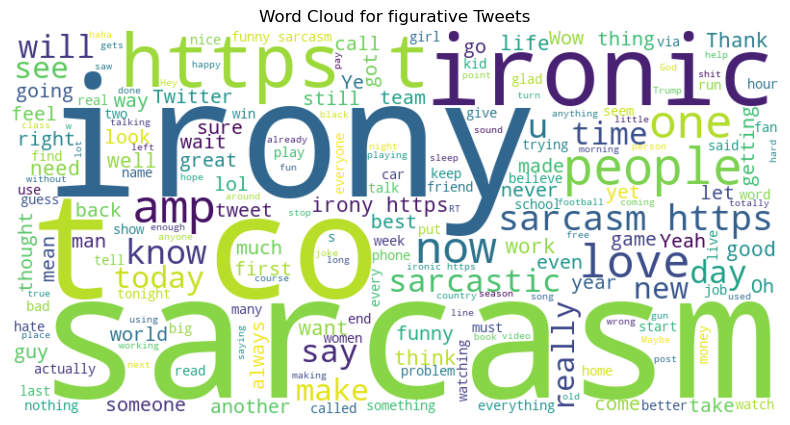

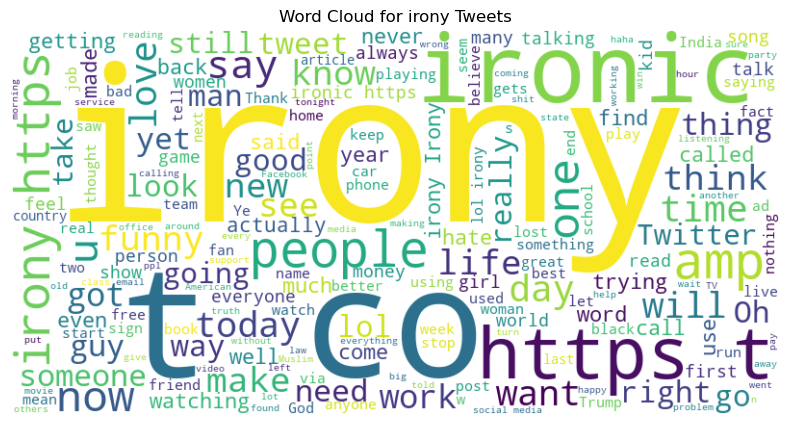

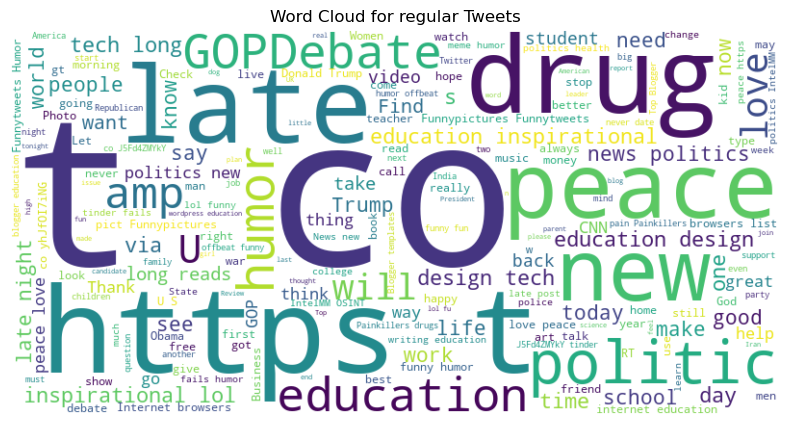

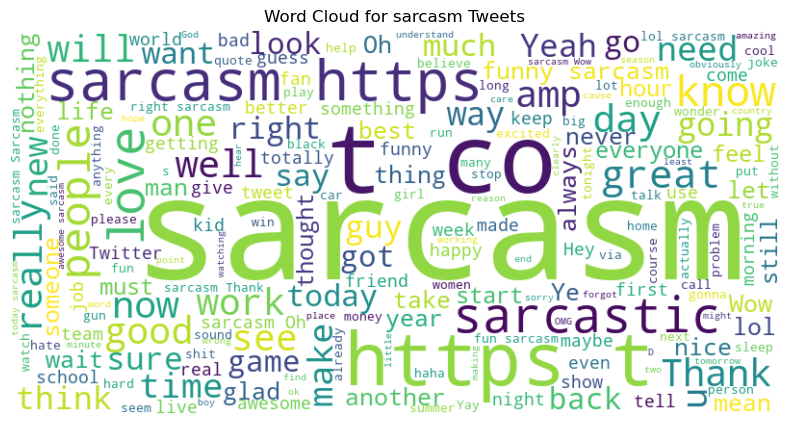

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word clouds for each class
def generate_word_clouds(data):
    classes = data['class'].unique()
    for category in classes:
        text = ' '.join(data[data['class'] == category]['tweets'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {category} Tweets')
        plt.axis('off')
        plt.show()

# Generate word clouds for each category
generate_word_clouds(data)


In [10]:
# Function to generate word frequency for a specific class
def get_word_freq_by_class(data, class_name):
    class_data = data[data['class'] == class_name]
    all_words_class = ' '.join(class_data['clean_tweets'])
    word_freq_class = Counter(all_words_class.split())
    return word_freq_class.most_common(10)

# Getting the most common words for each class
most_common_words_fig = get_word_freq_by_class(data, 'figurative')
most_common_words_irony = get_word_freq_by_class(data, 'irony')
most_common_words_sarcasm = get_word_freq_by_class(data, 'sarcasm')
most_common_words_regular = get_word_freq_by_class(data, 'regular')

most_common_words = {
    "Figurative": most_common_words_fig,
    "Irony": most_common_words_irony,
    "Sarcasm": most_common_words_sarcasm,
    "Regular": most_common_words_regular
}

most_common_words


{'Figurative': [('the', 9836),
  ('to', 6923),
  ('a', 6434),
  ('i', 4999),
  ('is', 4075),
  ('of', 4056),
  ('and', 3578),
  ('in', 3573),
  ('you', 3013),
  ('for', 2963)],
 'Irony': [('the', 10925),
  ('to', 7405),
  ('a', 6976),
  ('of', 4698),
  ('i', 4409),
  ('is', 4230),
  ('in', 4211),
  ('and', 3940),
  ('on', 3310),
  ('for', 2901)],
 'Sarcasm': [('the', 8101),
  ('to', 6293),
  ('a', 5574),
  ('i', 5277),
  ('is', 3630),
  ('of', 3235),
  ('you', 3208),
  ('and', 3145),
  ('for', 2899),
  ('in', 2867)],
 'Regular': [('the', 5509),
  ('to', 4362),
  ('a', 3195),
  ('of', 3105),
  ('in', 2838),
  ('for', 2388),
  ('and', 2342),
  ('is', 2194),
  ('on', 1889),
  ('you', 1649)]}

## N Gram Analysis

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top N n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 10 bigrams and trigrams
top_bigrams = get_top_ngrams(data['clean_tweets'], n=10, ngram_range=(2, 2))
top_trigrams = get_top_ngrams(data['clean_tweets'], n=10, ngram_range=(3, 3))

top_bigrams, top_trigrams


([('im sure', 291),
  ('dont know', 255),
  ('social media', 248),
  ('just love', 230),
  ('looks like', 212),
  ('donald trump', 184),
  ('dont think', 146),
  ('internet browsers', 146),
  ('browsers list', 146),
  ('good thing', 137)],
 [('internet browsers list', 146),
  ('10 types men', 99),
  ('types men date', 98),
  ('web design hoting', 74),
  ('design hoting rea', 72),
  ('android design reads', 72),
  ('employer code reads', 68),
  ('guitar pick handmade', 45),
  ('funny pictures day', 42),
  ('dont just love', 35)])

In [12]:
# List of example words to compare
example_words = ['love', 'hate', 'great', 'terrible']

# Function to get word frequency for specific words by class
def get_word_freq_by_class_for_words(data, words):
    word_freq_by_class = {}
    for word in words:
        freq = data[data['clean_tweets'].str.contains(word)]['class'].value_counts()
        word_freq_by_class[word] = freq
    return word_freq_by_class

# Get word frequency for example words by class
word_freq_by_class = get_word_freq_by_class_for_words(data, example_words)

word_freq_by_class


{'love': class
 sarcasm       1267
 figurative     890
 irony          520
 regular        367
 Name: count, dtype: int64,
 'hate': class
 irony         272
 figurative    224
 sarcasm       180
 regular        56
 Name: count, dtype: int64,
 'great': class
 sarcasm       886
 figurative    580
 regular       240
 irony         213
 Name: count, dtype: int64,
 'terrible': class
 sarcasm       59
 figurative    38
 irony         19
 regular       19
 Name: count, dtype: int64}

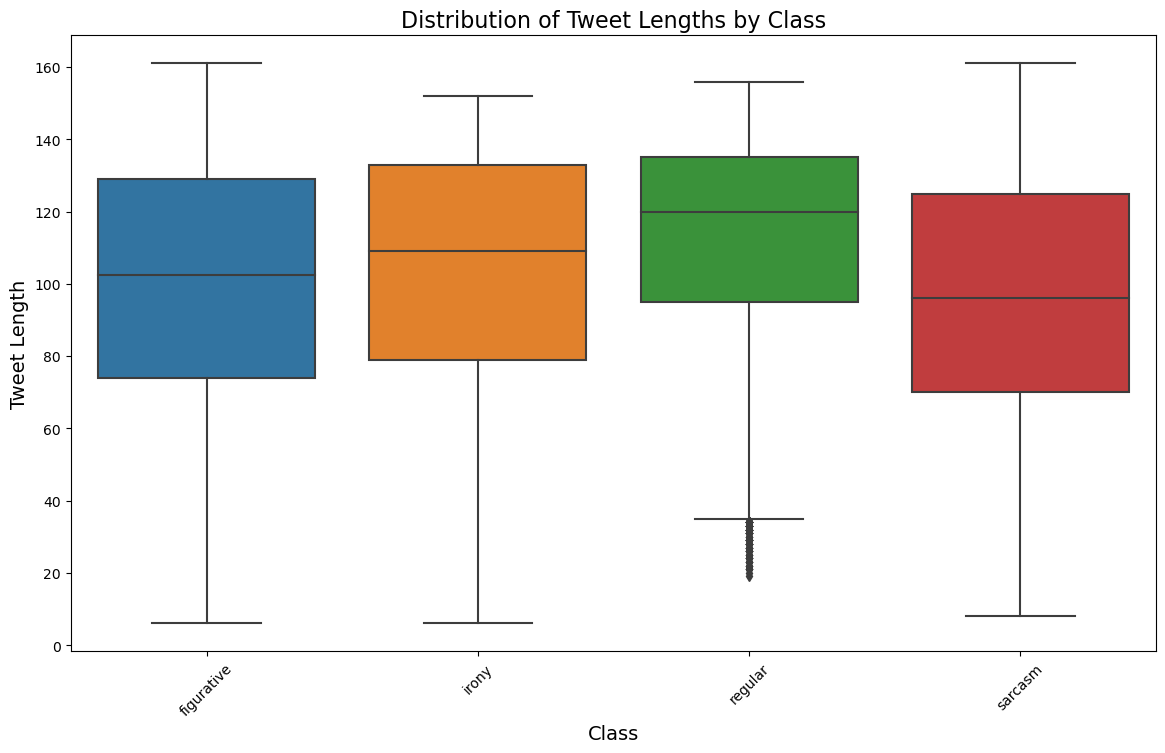

In [13]:
import seaborn as sns

# Plot tweet length distribution by class
plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='tweet_length', data=data)
plt.title('Distribution of Tweet Lengths by Class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Tweet Length', fontsize=14)
plt.xticks(rotation=45)
plt.show()


## LDA analysis

In [14]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

# Preprocess the tweets
data['tokenized_tweets'] = data['clean_tweets'].apply(word_tokenize)

# A dictionary and corpus for LDA
dictionary = corpora.Dictionary(data['tokenized_tweets'])
corpus = [dictionary.doc2bow(text) for text in data['tokenized_tweets']]

# Apply LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Display topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.044*"you" + 0.030*"to" + 0.030*"i" + 0.021*"it" + 0.020*"that"')
(1, '0.088*"the" + 0.038*"of" + 0.028*"in" + 0.022*"to" + 0.019*"is"')
(2, '0.066*"a" + 0.017*"is" + 0.016*"and" + 0.013*"for" + 0.011*"to"')
(3, '0.033*"of" + 0.027*"the" + 0.020*"a" + 0.018*"is" + 0.009*"very"')
(4, '0.041*"the" + 0.036*"to" + 0.034*"i" + 0.026*"my" + 0.024*"a"')


In [15]:
# Function to assign the dominant topic to each tweet
def assign_topic(lda_model, corpus):
    topics = []
    for doc in corpus:
        topic_probs = lda_model.get_document_topics(doc)
        # Get the topic with the highest probability
        dominant_topic = max(topic_probs, key=lambda item: item[1])[0]
        topics.append(dominant_topic)
    return topics

# Assign topics to each tweet
data['dominant_topic'] = assign_topic(lda_model, corpus)


In [16]:
# Cross-tabulate the dominant topics with the classes
topic_class_distribution = pd.crosstab(data['class'], data['dominant_topic'])

# Display the distribution
print(topic_class_distribution)


dominant_topic     0     1     2     3     4
class                                       
figurative      6175  4382  1956  1264  7461
irony           5327  5435  1883  1475  6774
regular         3356  5747  2335  1889  5268
sarcasm         7043  3161  1708   895  7874


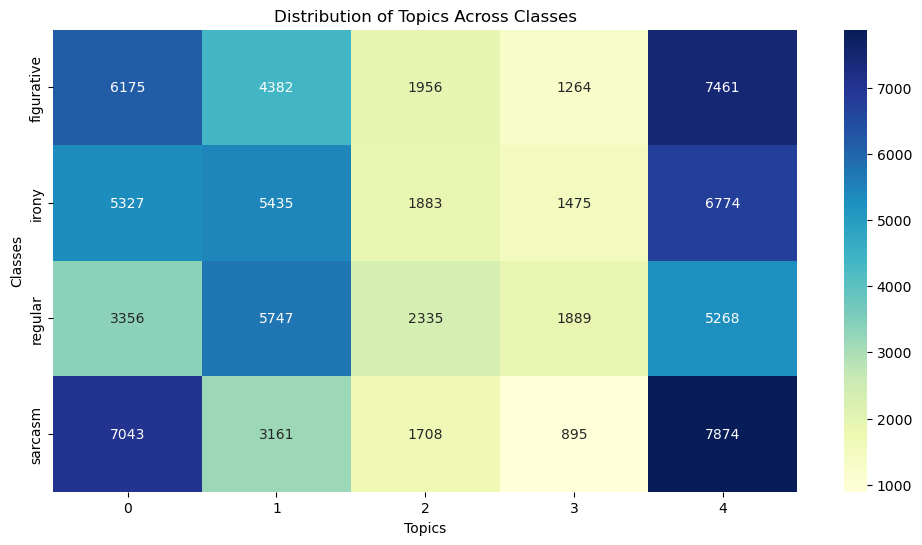

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of topics across classes
plt.figure(figsize=(12, 6))
sns.heatmap(topic_class_distribution, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribution of Topics Across Classes')
plt.xlabel('Topics')
plt.ylabel('Classes')
plt.show()


In [ ]:
Explain the results
